In [29]:
#Importing Libraries,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Dislay max columns and rows,
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [31]:
#Load dataset,
data = pd.read_csv(r"C:\crime place 1\17_Crime_by_place_of_occurrence_2014.csv")

In [32]:
data

,States/UTs,Year,Residence_Dacoity_Cases reported,Residence_Dacoity_Value of property stolen,Residence_Robbery_Cases reported,Residence_Robbery_Value of property stolen,Residence_Burglary_Cases reported,Residence_Burglary_Value of property stolen,Residence_Theft_Cases reported,Residence_Theft_Value of property stolen,Highways_Dacoity_Cases reported,Highways_Dacoity_Value of property stolen,Highways_Robbery_Cases reported,Highways_Robbery_Value of property stolen,Highways_Burglary_Cases reported,Highways_Burglary_Value of property stolen,Highways_Theft_Cases reported,Highways_Theft_Value of property stolen,RiverOrSea_Dacoity_Cases reported,RiverOrSea_Dacoity_Value of property stolen,RiverOrSea_Robbery_Cases reported,RiverOrSea_Robbery_Value of property stolen,RiverOrSea_Burglary_Cases reported,RiverOrSea_Burglary_Value of property stolen,RiverOrSea_Theft_Cases reported,RiverOrSea_Theft_Value of property stolen,Railways_Dacoity_Cases reported,Railways_Dacoity_Value of property stolen,Railways_Robbery_Cases reported,Railways_Robbery_Value of property stolen,Railways_Burglary_Cases reported,Railways_Burglary_Value of property stolen,Railways_Theft_Cases reported,Railways_Theft_Value of property stolen,Religious Places_Dacoity_Cases reported,Religious Places_Dacoity_Value of property stolen,Religious Places_Robbery_Cases reported,Religious Places_Robbery_Value of property stolen,Religious Places_Burglary_Cases reported,Religious Places_Burglary_Value of property stolen,Religious Places_Theft_Cases reported,Religious Places_Theft_Value of property stolen,ATM_Dacoity_Cases reported,ATM_Dacoity_Value of property stolen,ATM_Robbery_Cases reported,ATM_Robbery_Value of property stolen,ATM_Burglary_Cases reported,ATM_Burglary_Value of property stolen,ATM_Theft_Cases reported,ATM_Theft_Value of property stolen,Bank_Dacoity_Cases reported,Bank_Dacoity_Value of property stolen,Bank_Robbery_Cases reported,Bank_Robbery_Value of property stolen,Bank_Burglary_Cases reported,Bank_Burglary_Value of property stolen,Bank_Theft_Cases reported,Bank_Theft_Value of property stolen,CommEst_Dacoity_Cases reported,CommEst_Dacoity_Value of property stolen,CommEst_Robbery_Cases reported,CommEst_Robbery_Value of property stolen,CommEst_Burglary_Cases reported,CommEst_Burglary_Value of property stolen,CommEst_Theft_Cases reported,CommEst_Theft_Value of property stolen,OtherPlaces_Dacoity_Cases reported,OtherPlaces_Dacoity_Value of property stolen,OtherPlaces_Robbery_Cases reported,OtherPlaces_Robbery_Value of property stolen,OtherPlaces_Burglary_Cases reported,OtherPlaces_Burglary_Value of property stolen,OtherPlaces_Theft_Cases reported,OtherPlaces_Theft_Value of property stolen,Total_Dacoity_Cases reported,Total_Dacoity_Value of property stolen,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,Total_Burglary_Cases reported,Total_Burglary_Value of property stolen,Total_Theft_Cases reported,Total_Theft_Value of property stolen
0,Andhra Pradesh,2014,27,7983001,124,10577950,3530,226363051,5757,199348324,25,11356187,155,9135413,1,65000,2063,133931812,0,0,1,25000,0,0,6,48500,2,15000,11,4015320,0,0,1499,57043722,1,30000,48,7813627,137,5771775.0,121,4044289,0,0,0,0,11,1216300,57,1565651,0,0,0,0,4,215000,70,2597500,2,5656000,4,1537200,453,58698377,1047,44014781,18,2112180,90,8044133,583,29022813,4997,199285711,75,27152368,433,41148643,4719,3.213523e+08,15617,641880290
1,Arunachal Pradesh,2014,3,67500,8,86350,103,6637940,173,15422078,2,160000,23,2041480,0,0,84,11213650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35000,0,0,0,0,0,0.0,21,969280,0,0,0,0,2,50000,0,0,0,0,1,4200000,1,30000,0,0,2,23500,6,126500,51,3678635,61,13901750,5,226000,23,2264600,67,1928240,158,37247470,12,477000,61,8718930,224,1.232482e+07,498,78789228
2,Assam,2014,144,10693775,315,4191631,2293,26376373,4503,131897564,25,517160,74,887600,65,277000,317,3798500,0,0,1,150000,0,0,0,0,0,0,0,0,0,0,12,91000,0,0,9,35000,57,11700.0,5,205000,5,1475000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,587900,110,1458386,647,51

In [33]:
data.describe(include= 'all')

,States/UTs,Year,Residence_Dacoity_Cases reported,Residence_Dacoity_Value of property stolen,Residence_Robbery_Cases reported,Residence_Robbery_Value of property stolen,Residence_Burglary_Cases reported,Residence_Burglary_Value of property stolen,Residence_Theft_Cases reported,Residence_Theft_Value of property stolen,Highways_Dacoity_Cases reported,Highways_Dacoity_Value of property stolen,Highways_Robbery_Cases reported,Highways_Robbery_Value of property stolen,Highways_Burglary_Cases reported,Highways_Burglary_Value of property stolen,Highways_Theft_Cases reported,Highways_Theft_Value of property stolen,RiverOrSea_Dacoity_Cases reported,RiverOrSea_Dacoity_Value of property stolen,RiverOrSea_Robbery_Cases reported,RiverOrSea_Robbery_Value of property stolen,RiverOrSea_Burglary_Cases reported,RiverOrSea_Burglary_Value of property stolen,RiverOrSea_Theft_Cases reported,RiverOrSea_Theft_Value of property stolen,Railways_Dacoity_Cases reported,Railways_Dacoity_Value of property stolen,Railways_Robbery_Cases reported,Railways_Robbery_Value of property stolen,Railways_Burglary_Cases reported,Railways_Burglary_Value of property stolen,Railways_Theft_Cases reported,Railways_Theft_Value of property stolen,Religious Places_Dacoity_Cases reported,Religious Places_Dacoity_Value of property stolen,Religious Places_Robbery_Cases reported,Religious Places_Robbery_Value of property stolen,Religious Places_Burglary_Cases reported,Religious Places_Burglary_Value of property stolen,Religious Places_Theft_Cases reported,Religious Places_Theft_Value of property stolen,ATM_Dacoity_Cases reported,ATM_Dacoity_Value of property stolen,ATM_Robbery_Cases reported,ATM_Robbery_Value of property stolen,ATM_Burglary_Cases reported,ATM_Burglary_Value of property stolen,ATM_Theft_Cases reported,ATM_Theft_Value of property stolen,Bank_Dacoity_Cases reported,Bank_Dacoity_Value of property stolen,Bank_Robbery_Cases reported,Bank_Robbery_Value of property stolen,Bank_Burglary_Cases reported,Bank_Burglary_Value of property stolen,Bank_Theft_Cases reported,Bank_Theft_Value of property stolen,CommEst_Dacoity_Cases reported,CommEst_Dacoity_Value of property stolen,CommEst_Robbery_Cases reported,CommEst_Robbery_Value of property stolen,CommEst_Burglary_Cases reported,CommEst_Burglary_Value of property stolen,CommEst_Theft_Cases reported,CommEst_Theft_Value of property stolen,OtherPlaces_Dacoity_Cases reported,OtherPlaces_Dacoity_Value of property stolen,OtherPlaces_Robbery_Cases reported,OtherPlaces_Robbery_Value of property stolen,OtherPlaces_Burglary_Cases reported,OtherPlaces_Burglary_Value of property stolen,OtherPlaces_Theft_Cases reported,OtherPlaces_Theft_Value of property stolen,Total_Dacoity_Cases reported,Total_Dacoity_Value of property stolen,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,Total_Burglary_Cases reported,Total_Burglary_Value of property stolen,Total_Theft_Cases reported,Total_Theft_Value of property stolen
count,39,39.0,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,39.000000,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01
unique,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [34]:
data.columns

Index(['States/UTs', 'Year', 'Residence_Dacoity_Cases reported',
       'Residence_Dacoity_Value of property stolen',
       'Residence_Robbery_Cases reported',
       'Residence_Robbery_Value of property stolen',
       'Residence_Burglary_Cases reported',
       'Residence_Burglary_Value of property stolen',
       'Residence_Theft_Cases reported',
       'Residence_Theft_Value of property stolen',
       'Highways_Dacoity_Cases reported',
       'Highways_Dacoity_Value of property stolen',
       'Highways_Robbery_Cases reported',
       'Highways_Robbery_Value of property stolen',
       'Highways_Burglary_Cases reported',
       'Highways_Burglary_Value of property stolen',
       'Highways_Theft_Cases reported',
       'Highways_Theft_Value of property stolen',
       'RiverOrSea_Dacoity_Cases reported',
       'RiverOrSea_Dacoity_Value of property stolen',
       'RiverOrSea_Robbery_Cases reported',
       'RiverOrSea_Robbery_Value of property stolen',
       'RiverOrSea_Burglar

In [35]:
data.shape

(39, 82)

In [36]:
data.isnull().sum()

States/UTs                                            0
Year                                                  0
Residence_Dacoity_Cases reported                      0
Residence_Dacoity_Value of property stolen            0
Residence_Robbery_Cases reported                      0
Residence_Robbery_Value of property stolen            0
Residence_Burglary_Cases reported                     0
Residence_Burglary_Value of property stolen           0
Residence_Theft_Cases reported                        0
Residence_Theft_Value of property stolen              0
Highways_Dacoity_Cases reported                       0
Highways_Dacoity_Value of property stolen             0
Highways_Robbery_Cases reported                       0
Highways_Robbery_Value of property stolen             0
Highways_Burglary_Cases reported                      0
Highways_Burglary_Value of property stolen            0
Highways_Theft_Cases reported                         0
Highways_Theft_Value of property stolen         

In [37]:
data.dtypes

States/UTs                                             object
Year                                                    int64
Residence_Dacoity_Cases reported                        int64
Residence_Dacoity_Value of property stolen              int64
Residence_Robbery_Cases reported                        int64
Residence_Robbery_Value of property stolen              int64
Residence_Burglary_Cases reported                       int64
Residence_Burglary_Value of property stolen             int64
Residence_Theft_Cases reported                          int64
Residence_Theft_Value of property stolen                int64
Highways_Dacoity_Cases reported                         int64
Highways_Dacoity_Value of property stolen               int64
Highways_Robbery_Cases reported                         int64
Highways_Robbery_Value of property stolen               int64
Highways_Burglary_Cases reported                        int64
Highways_Burglary_Value of property stolen              int64
Highways

In [38]:
data['Residence_Dacoity_Cases reported'].unique()

array([  27,    3,  144,  174,  125,   20,    0,  110,   64,   19,   35,
        161,   10,    1,    7,  113,    8,   11,   45,   30,  121,   15,
         56,   14, 1333, 1348], dtype=int64)

In [39]:
data['Total_Theft_Cases reported'].unique()

array([ 15617,    498,  12737,  22888,   6098,   1154,  14337,  20314,
          652,   1773,   7046,  21019,   4700,  29244,  56283,   1001,
          857,    852,    418,   9410,   5067,  29095,    126,  11969,
        15342,    369,  48380,   1737,  21366,     45,   1260,     38,
           31,  78753,     15,    424, 360349,  80566, 440915],
      dtype=int64)

<AxesSubplot:xlabel='Residence_Dacoity_Cases reported', ylabel='Total_Theft_Cases reported'>

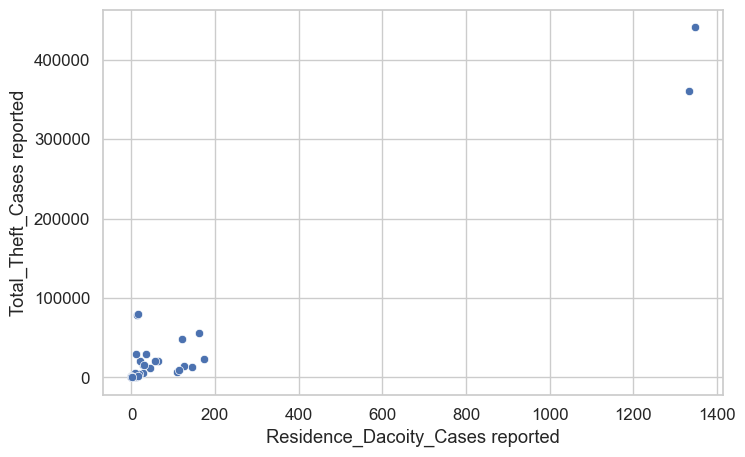

In [40]:
#Plotting Scatterplot,
sns.scatterplot(data=data, x='Residence_Dacoity_Cases reported',y='Total_Theft_Cases reported' )

<AxesSubplot:xlabel='ATM_Dacoity_Cases reported', ylabel='ATM_Dacoity_Value of property stolen'>

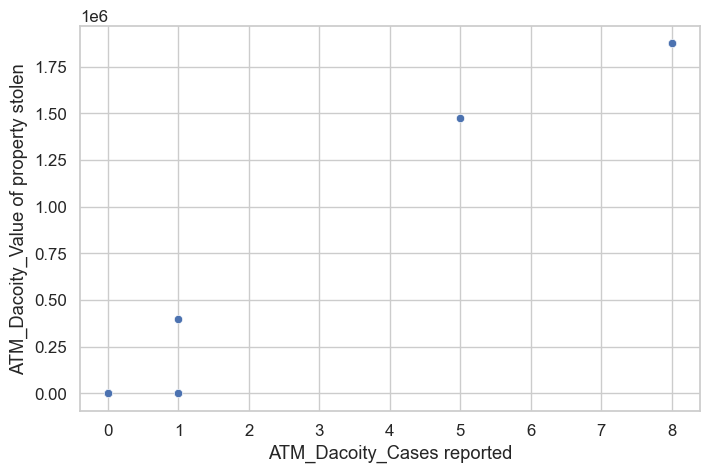

In [41]:
#Plotting Scatterplot,
sns.scatterplot(data=data, x='ATM_Dacoity_Cases reported',y='ATM_Dacoity_Value of property stolen' )

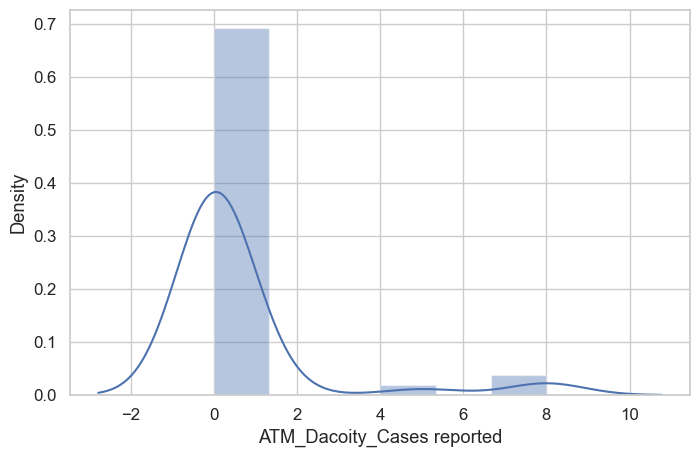

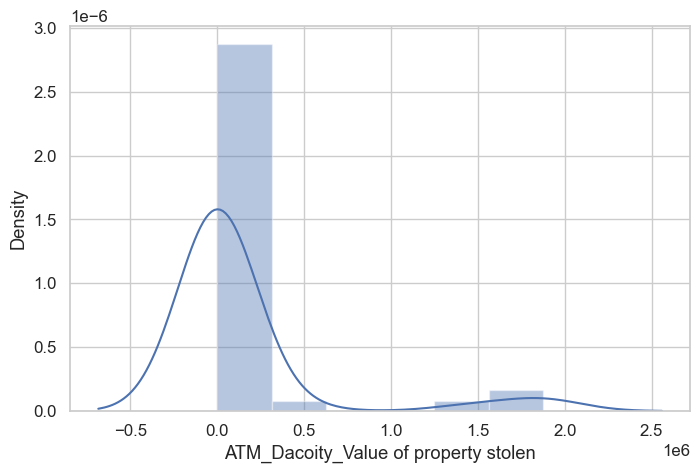

In [56]:
#Plotting Distplot
columns = ['ATM_Dacoity_Cases reported','ATM_Dacoity_Value of property stolen']
for columns in columns:
    plt.figure()
    sns.distplot(data[columns])
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    plt.savefig('Distplot.png', box_inches= 'tight')

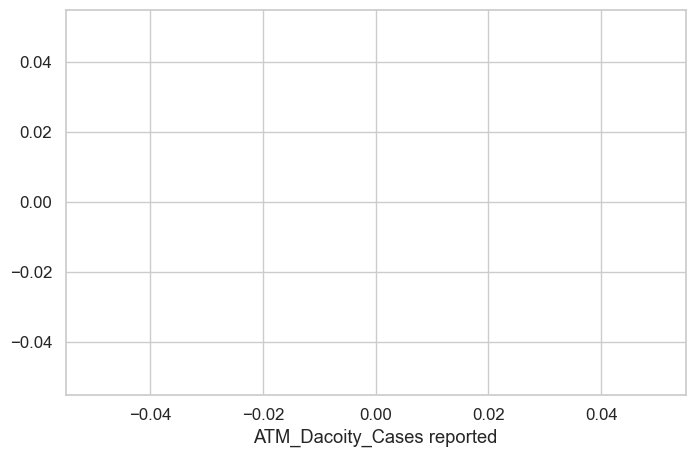

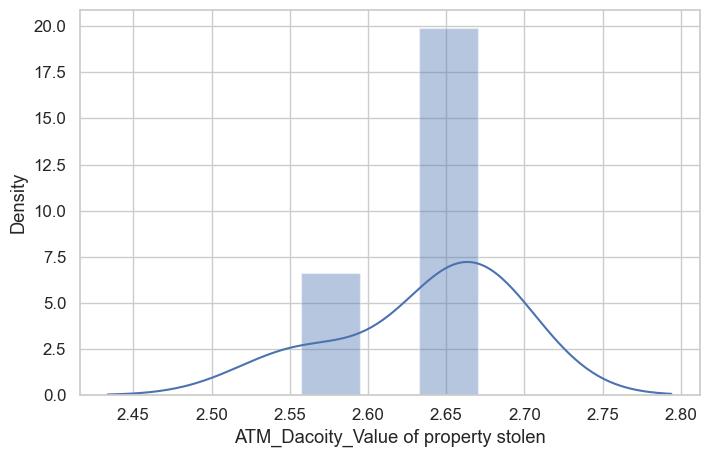

In [60]:
#log transformation

columns = ['ATM_Dacoity_Cases reported','ATM_Dacoity_Value of property stolen']
for columns in columns:
    data[columns]= np.log(data[columns])
    plt.figure()
    sns.distplot(data[columns]) 
    plt.savefig('LogTransformation.png', bbox_inches= 'tight')

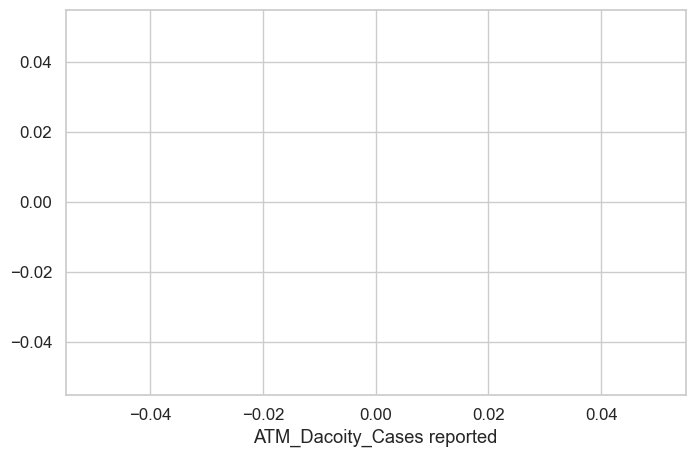

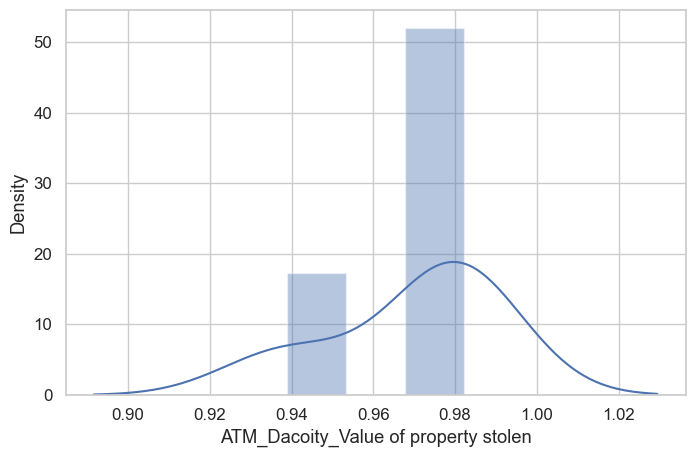

In [62]:
#log transformation

columns = ['ATM_Dacoity_Cases reported','ATM_Dacoity_Value of property stolen']
for columns in columns:
    data[columns]= np.log(data[columns])
    plt.figure()
    sns.distplot(data[columns]) 
    plt.savefig('LogTransformation.png', bbox_inches= 'tight')

In [63]:
data['States/UTs'].sort_values(ascending = True)

29        A & N Islands
0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
30           Chandigarh
4          Chhattisgarh
31           D&N Haveli
32          Daman & Diu
33             Delhi UT
5                   Goa
6               Gujarat
7               Haryana
8      Himachal Pradesh
9       Jammu & Kashmir
10            Jharkhand
11            Karnataka
12               Kerala
34          Lakshadweep
13       Madhya Pradesh
14          Maharashtra
15              Manipur
16            Meghalaya
17              Mizoram
18             Nagaland
19               Odisha
35           Puducherry
20               Punjab
21            Rajasthan
22               Sikkim
23           Tamil Nadu
24            Telangana
38    Total (All India)
36       Total (States)
37          Total (UTs)
25              Tripura
26        Uttar Pradesh
27          Uttarakhand
28          West Bengal
Name: States/UTs, dtype: object

In [64]:
data['States/UTs'].max()

'West Bengal'

In [71]:
data_copy = data[['States/UTs', 'Total_Robbery_Cases reported', 'Total_Robbery_Value of property stolen']]
data_copy

,States/UTs,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen
0,Andhra Pradesh,433,41148643
1,Arunachal Pradesh,61,8718930
2,Assam,1038,18121153
3,Bihar,1600,74012959
4,Chhattisgarh,405,26477826
5,Goa,32,2711685
6,Gujarat,1209,153432043
7,Haryana,874,214531110
8,Himachal Pradesh,16,1296520
9,Jammu & Kashmir,89,12761932


In [73]:
clustering = KMeans(n_clusters=5)
clustering.fit(data_copy[['Total_Robbery_Cases reported','Total_Robbery_Value of property stolen']])
data_copy['Robbery and Robbery cluster'] =clustering.labels_
data_copy.head()

,States/UTs,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,ATM and ATM cluster,Robbery and Robbery cluster
0,Andhra Pradesh,433,41148643,2,0
1,Arunachal Pradesh,61,8718930,2,0
2,Assam,1038,18121153,2,0
3,Bihar,1600,74012959,2,0
4,Chhattisgarh,405,26477826,2,0


In [74]:
clustering.cluster_centers_

array([[2.52115385e+02, 1.92263941e+07],
       [3.15270000e+04, 3.03442666e+09],
       [6.69300000e+03, 6.14539396e+08],
       [2.74155556e+03, 2.16696910e+08],
       [3.80710000e+04, 3.35683195e+09]])

In [75]:
clustering.inertia_

5.580266153725121e+16

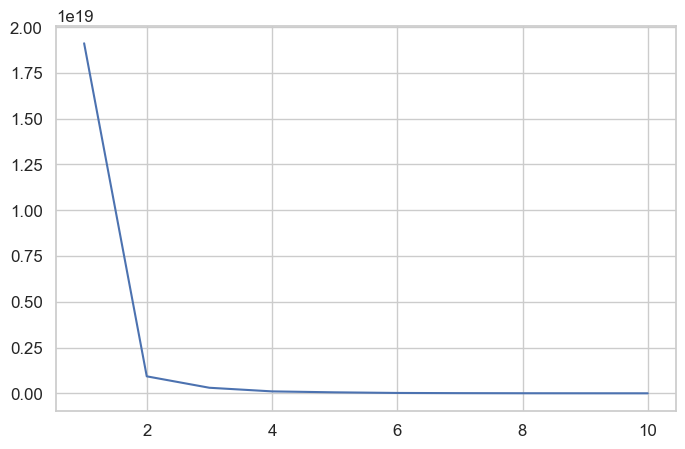

In [76]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_copy[['Total_Robbery_Cases reported','Total_Robbery_Value of property stolen']])
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores)

In [77]:
intertia_scores

[1.9119033164030018e+19,
 9.294624521510671e+17,
 3.0557476989882886e+17,
 1.0777524416700765e+17,
 5.580266153725121e+16,
 2.185924736515203e+16,
 1.1352344660899254e+16,
 5945937221194734.0,
 3910672354168571.5,
 2642035945898019.5]

In [78]:
data_copy.groupby(['Robbery and Robbery cluster'])['Total_Robbery_Cases reported', 'Total_Robbery_Value of property stolen'].mean()

,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen
Robbery and Robbery cluster,,
0,252.115385,1.922639e+07
1,31527.000000,3.034427e+09
2,6693.000000,6.145394e+08
3,2741.555556,2.166969e+08
4,38071.000000,3.356832e+09


In [81]:
#creating a datframe to get the average of count and weight variables with each cluster
df = pd.DataFrame(data_copy.groupby(['Robbery and Robbery cluster'])['Total_Robbery_Cases reported', 'Total_Robbery_Value of property stolen'].mean())
df

,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen
Robbery and Robbery cluster,,
0,252.115385,1.922639e+07
1,31527.000000,3.034427e+09
2,6693.000000,6.145394e+08
3,2741.555556,2.166969e+08
4,38071.000000,3.356832e+09


<AxesSubplot:xlabel='Total_Robbery_Cases reported', ylabel='Total_Robbery_Value of property stolen'>

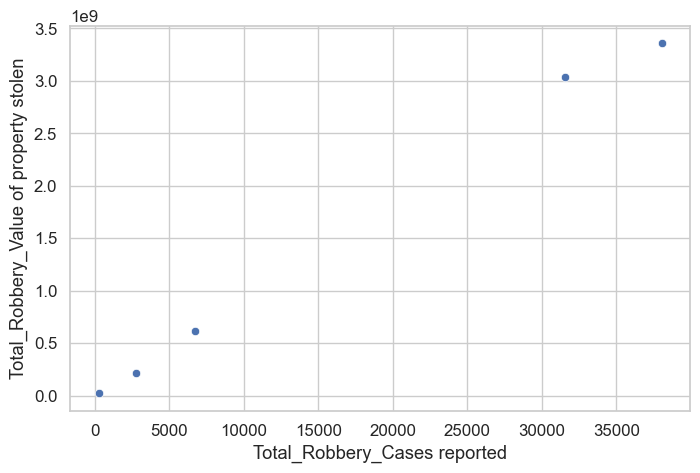

In [82]:
#Centroids of each cluster 
sns.scatterplot(data=df, x='Total_Robbery_Cases reported',y='Total_Robbery_Value of property stolen')

In [84]:
centroids =pd.DataFrame(clustering.cluster_centers_)
centroids.columns = ['x','y']

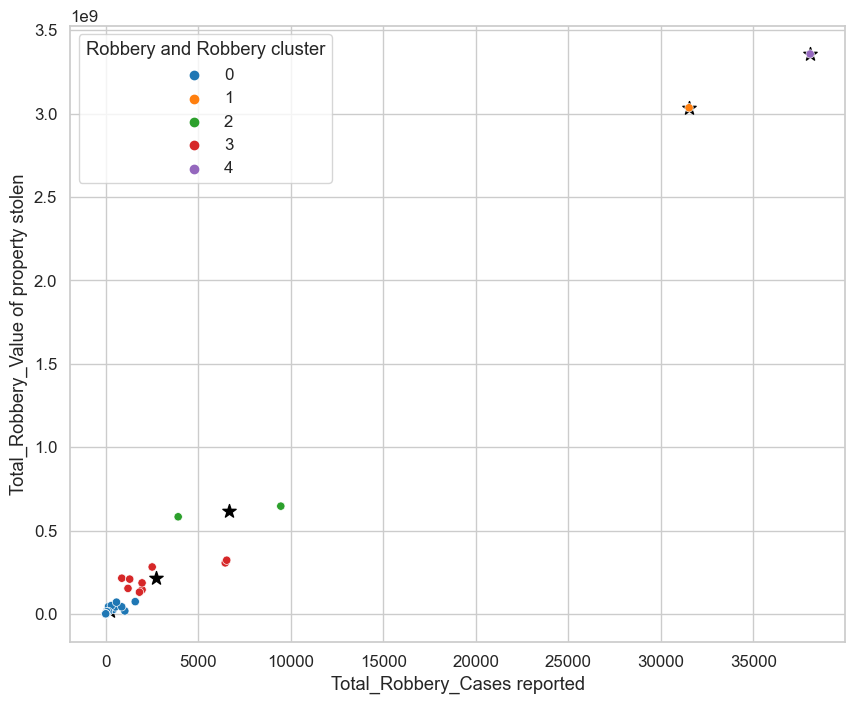

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(x=centroids['x'],y=centroids['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data_copy, x ='Total_Robbery_Cases reported',y='Total_Robbery_Value of property stolen',hue='Robbery and Robbery cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [86]:
Final_data = pd.concat([data_copy,df]) 
Final_data

,States/UTs,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,ATM and ATM cluster,Robbery and Robbery cluster
0,Andhra Pradesh,433.000000,4.114864e+07,2.0,0.0
1,Arunachal Pradesh,61.000000,8.718930e+06,2.0,0.0
2,Assam,1038.000000,1.812115e+07,2.0,0.0
3,Bihar,1600.000000,7.401296e+07,2.0,0.0
4,Chhattisgarh,405.000000,2.647783e+07,2.0,0.0
5,Goa,32.000000,2.711685e+06,2.0,0.0
6,Gujarat,1209.000000,1.534320e+08,0.0,3.0
7,Haryana,874.000000,2.145311e+08,0.0,3.0
8,Himachal Pradesh,16.000000,1.296520e+06,2.0,0.0
9,Jammu & Kashmir,89.000000,1.276193e+07,2.0,0.0
